Import required libraries

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

Load data set and do pre process

In [38]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the array to 4-dimsions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Create categorical class label data for CC loss function
y_train_1 = np_utils.to_categorical(y_train, 10)
y_test_1 = np_utils.to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Build the model

In [39]:
# Convolutional model
model = Sequential()

# First convolution layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Second convolution layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Third convolution layer with flattern
model.add(Conv2D(128, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))

# Fully connected layer one
model.add(Dense(625, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer two
model.add(Dense(10, activation='softmax'))

Train and evaluate the model for base

In [46]:
number_of_epoch = 10
opt = RMSprop(lr=0.001, rho=0.9)

# Evaluation one
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train_1, epochs=number_of_epoch, batch_size=128, shuffle=True, verbose=1)
evaluation_1 = model.evaluate(x_test, y_test_1, batch_size=256, verbose=1)


# Evaluation two
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epoch, batch_size=128, shuffle=True, verbose=1)
evaluation_2 = model.evaluate(x_test, y_test, batch_size=256, verbose=1)


# Evaluation three
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train_1, epochs=number_of_epoch, batch_size=128, shuffle=True, verbose=1)
evaluation_3 = model.evaluate(x_test, y_test_1, batch_size=256, verbose=1)



# Evaluation four
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epoch, batch_size=128, shuffle=True, verbose=1)
evaluation_4 = model.evaluate(x_test, y_test, batch_size=256, verbose=1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 1, 1, 128)        

Print the base model result

In [47]:
print("\n\n")

print('Evalution one summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation_1[0], evaluation_1[1]))
print('Evalution two summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation_2[0], evaluation_2[1]))
print('Evalution three summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation_3[0], evaluation_3[1]))
print('Evalution four summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation_4[0], evaluation_4[1]))




Evalution one summary: Loss over the test dataset : 0.07825, Accuracy : 0.97920
Evalution two summary: Loss over the test dataset : 0.06522, Accuracy : 0.98140
Evalution three summary: Loss over the test dataset : 0.08153, Accuracy : 0.97650
Evalution four summary: Loss over the test dataset : 0.04099, Accuracy : 0.98700


Check accuracy and loss values for various epoch values

In [ ]:
# Check accuracy and loss values agains different epoch values
number_of_epochs = [5, 10, 15, 20, 25]
opt = RMSprop(lr=0.001, rho=0.9)
accuracy_model_1 = []
loss_model_1 = []
accuracy_model_2 = []
loss_model_2 = []
accuracy_model_3 = []
loss_model_3 = []
accuracy_model_4 = []
loss_model_4 = []

for number in number_of_epochs:

  # Evaluation one
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train_1, epochs=number, batch_size=128, shuffle=True, verbose=1)
  evaluation_1 = model.evaluate(x_test, y_test_1, batch_size=256, verbose=1)

  loss_model_1.append(evaluation_1[0])
  accuracy_model_1.append(evaluation_1[1])
  

  # Evaluation two
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=number, batch_size=128, shuffle=True, verbose=1)
  evaluation_2 = model.evaluate(x_test, y_test, batch_size=256, verbose=1)
  
  loss_model_2.append(evaluation_2[0])
  accuracy_model_2.append(evaluation_2[1])


  # Evaluation three
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train_1, epochs=number, batch_size=128, shuffle=True, verbose=1)
  evaluation_3 = model.evaluate(x_test, y_test_1, batch_size=256, verbose=1)
  
  loss_model_3.append(evaluation_3[0])
  accuracy_model_3.append(evaluation_3[1])


  # Evaluation four
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=number, batch_size=128, shuffle=True, verbose=1)
  evaluation_4 = model.evaluate(x_test, y_test, batch_size=256, verbose=1)
  
  loss_model_4.append(evaluation_4[0])
  accuracy_model_4.append(evaluation_4[1])
  

Accuracy data table and loss data table

In [42]:
# Show previos evaluate values
accuracy_map = {}

accuracy_map["Model one : "] = accuracy_model_1
accuracy_map["Model two : "] = accuracy_model_2
accuracy_map["Model three : "] = accuracy_model_3
accuracy_map["Model four : "] = accuracy_model_4

print(accuracy_map)


loss_map = {}

loss_map["Model one : "] = loss_model_1
loss_map["Model two : "] = loss_model_2
loss_map["Model three : "] = loss_model_3
loss_map["Model four : "] = loss_model_4

print(accuracy_map)

{'Model one : ': [0.9900000095367432, 0.989300012588501, 0.9876999855041504, 0.9799000024795532, 0.9861000180244446], 'Model two : ': [0.9886000156402588, 0.9873999953269958, 0.9882000088691711, 0.9811000227928162, 0.9851999878883362], 'Model three : ': [0.9905999898910522, 0.9915000200271606, 0.9908999800682068, 0.9908000230789185, 0.9868000149726868], 'Model four : ': [0.9909999966621399, 0.9896000027656555, 0.9904000163078308, 0.9904000163078308, 0.9894999861717224]}
{'Model one : ': [0.9900000095367432, 0.989300012588501, 0.9876999855041504, 0.9799000024795532, 0.9861000180244446], 'Model two : ': [0.9886000156402588, 0.9873999953269958, 0.9882000088691711, 0.9811000227928162, 0.9851999878883362], 'Model three : ': [0.9905999898910522, 0.9915000200271606, 0.9908999800682068, 0.9908000230789185, 0.9868000149726868], 'Model four : ': [0.9909999966621399, 0.9896000027656555, 0.9904000163078308, 0.9904000163078308, 0.9894999861717224]}


Plot result data

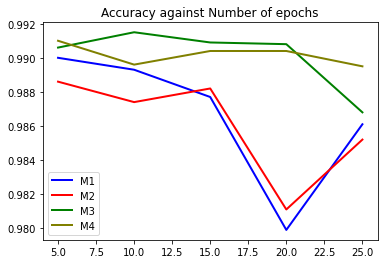

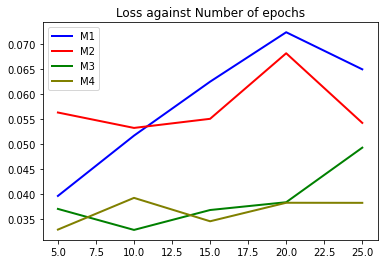

In [45]:
# Plot the evaluate results
plt.title('Accuracy against Number of epochs')
plt.plot( number_of_epochs, accuracy_model_1, color='blue', linewidth=2, label = "M1")
plt.plot( number_of_epochs, accuracy_model_2, color='red', linewidth=2, label = "M2")
plt.plot( number_of_epochs, accuracy_model_3, color='green', linewidth=2, label = "M3")
plt.plot( number_of_epochs, accuracy_model_4, color='olive', linewidth=2, label = "M4")
plt.legend()
plt.show()

print("\n\n")

plt.title('Loss against Number of epochs')
plt.plot( number_of_epochs, loss_model_1, color='blue', linewidth=2, label = "M1")
plt.plot( number_of_epochs, loss_model_2, color='red', linewidth=2, label = "M2")
plt.plot( number_of_epochs, loss_model_3, color='green', linewidth=2, label = "M3")
plt.plot( number_of_epochs, loss_model_4, color='olive', linewidth=2, label = "M4")
plt.legend()
plt.show()